# Percentage of almost constant user using various social media
1. How social media usage changes depending on no. of hours of activity
2. Which social media among Twitter, Instagram, Facebook, Snapchat and youtube used more as compared to others

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

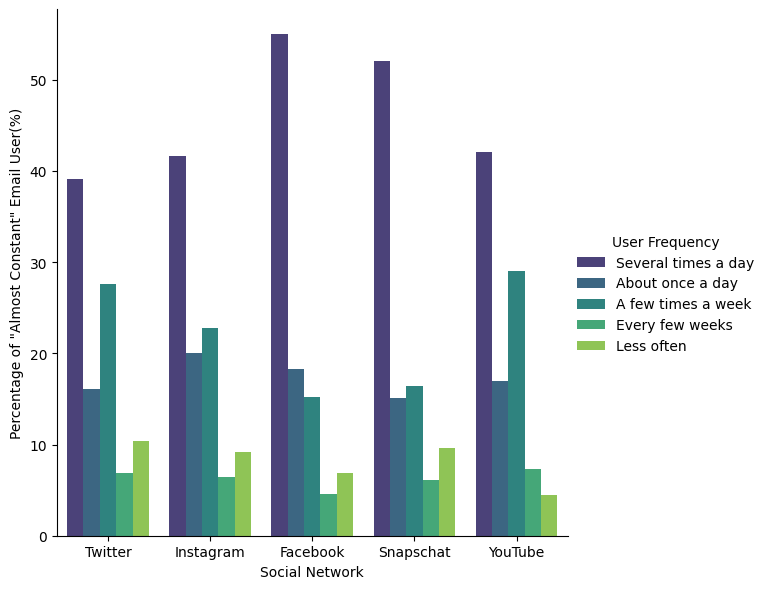

In [ ]:
# [Your Code Starts Here]

df = pd.read_csv('/content/Jan 25-Feb 8, 2021 - Core Trends Survey - CSV.csv')
social_media = df[['intfreq','sns2a', 'sns2b', 'sns2c', 'sns2d', 'sns2e']]
high_user = social_media[social_media['intfreq'] == str(1)]
high_user = high_user.rename(columns={'sns2a': 'Twitter', 'sns2b': 'Instagram', 'sns2c': 'Facebook', 'sns2d': 'Snapschat','sns2e': 'YouTube'})
user_long = pd.melt(high_user, id_vars=['intfreq'], var_name = 'social_media', value_name = 'value' )
df_user = user_long.replace(r'^\s*$', np.nan, regex=True)
df_user.dropna(subset=['value'])
grouped = df_user.groupby(['value', 'social_media']).size().reset_index(name='count')
total_count = grouped.groupby('social_media').sum()
merged_df = pd.merge(grouped, total_count, on='social_media', suffixes=('', '_total'))


merged_df['percentage'] = (merged_df['count'] / merged_df['count_total']) * 100
value_mapping = {
    '1': 'Several times a day',
    '2': 'About once a day',
    '3': 'A few times a week',
    '4': 'Every few weeks',
    '5': 'Less often'
}

# Apply mapping
merged_df['value'] = merged_df['value'].map(value_mapping)
order = ['Twitter', 'Instagram', 'Facebook', 'Snapschat', 'YouTube']
ax = sns.catplot(
    data=merged_df, kind="bar",
    x="social_media", y="percentage", hue="value",
    errorbar="sd",  height=6, order=order, palette= "viridis",
)

legendObj = ax.legend
legendObj.set_title('User Frequency')
ax.set_axis_labels('Social Network', 'Percentage of "Almost Constant" Email User(%)')








In [ ]:
# Run descriptive statistics on the data and develop ideas on what to explore

# [Your Code Starts Here]
df = pd.read_csv('/content/Jan 25-Feb 8, 2021 - Core Trends Survey - CSV.csv')
df.info()
integer_df = df.select_dtypes(include='int')
integer_df.describe()
object_df = df.select_dtypes(include='object')
object_df.describe()
# [Your Code Ends Here]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 89 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   respid             1502 non-null   int64  
 1   sample             1502 non-null   int64  
 2   comp               1502 non-null   int64  
 3   int_date           1502 non-null   object 
 4   lang               1502 non-null   int64  
 5   state              1502 non-null   int64  
 6   density            1502 non-null   int64  
 7   usr                1502 non-null   object 
 8   qs1                1502 non-null   object 
 9   sex                1502 non-null   int64  
 10  eminuse            1502 non-null   int64  
 11  intmob             1502 non-null   int64  
 12  intfreq            1502 non-null   object 
 13  snsint2            1502 non-null   int64  
 14  home4nw            1502 non-null   int64  
 15  bbhome1            1502 non-null   object 
 16  bbhome2            1502 

,int_date,usr,qs1,intfreq,bbhome1,bbhome2,device1a,smart2,bbsmart2,bbsmart3a,...,racem2,racem3,racem4,birth_hisp,partyln,hh3,ql1,ql1a,qc1,cellweight
count,1502,1502,1502,1502,1502,1502,1502,1502,1502,1502,...,1502,1502,1502,1502,1502,1502,1502,1502,1502,1502
unique,15,4,2,8,7,3,3,5,5,5,...,8,5,1,4,5,10,4,4,4,666
top,2/1/2021,S,2,2,2,,,1,,,...,,,,,,2,,,2,
freq,159,599,1202,744,1181,1482,1202,1290,1217,1217,...,1443,1495,1502,1340,841,746,1202,1475,824,300


Description of my findings
1. Frequency of internt uses has somewhat positive correlation to whether they use internet or not

2. Age also has somewhat positive correlation with whether they use internet or not

3. Whether they use internt or not and thiier income have very negative correlation.

<Axes: >

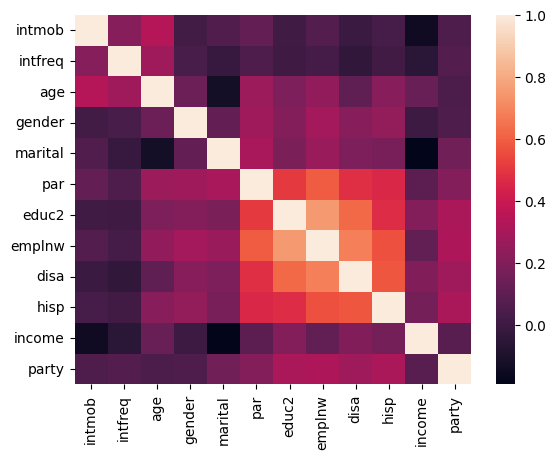

In [ ]:
# Create one or more visualizations

# [Your Code Starts Here]
internet = df[['intmob', 'intfreq', 'age', 'gender', 'marital', 'par', 'educ2', 'emplnw', 'disa', 'hisp', 'income', 'party']]
internet = internet.replace(r'^\s*$', np.nan, regex=True)
corr = internet.corr()
sns.heatmap(corr)


# [Your Code Ends Here]

Enter your 100-150 word description here.

<img src="http://today.uic.edu/wp-content/uploads/2014/09/5-bike-lane_orange.png" width="50px" align="left" float="left"/>

<br><br><br>

## Q2.2 (15%): _How not having internet affect differnt category of work during COVID_
Categories again which not having internet during covid include
1. Ease of information access on Covid
2. Connectivity with friends and family
3. Ease of looking for new job
4. Getting homework done
5. Health check up

The findings where as follow -
1. Majority of people believe that during covid doing homework without internet was very tough and seeking job too

2. While Information access and connectivity was only an minor disadvantage due to lack of internet



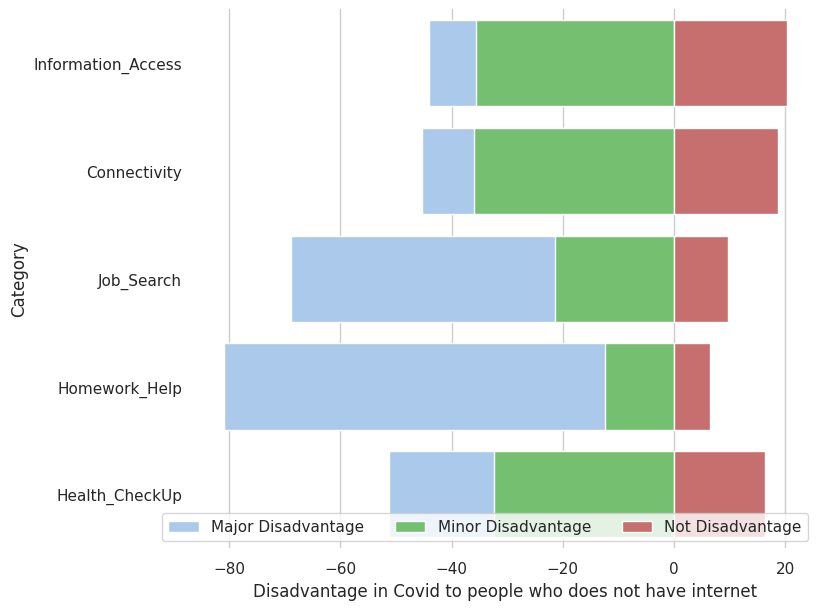

In [ ]:
# your Q2.2 visualization code should be included here
# make sure to execute it, so we can see your plot in the submitted pdf

# [Your Code Starts Here]

covid = df[['coviddisa', 'coviddisb', 'coviddisc', 'coviddisd', 'coviddise']]
covid = covid.rename(columns={'coviddisa': 'Information', 'coviddisb':'Connectivity','coviddisc' : 'JobSearch', 'coviddisd' : 'Homework', 'coviddise' :'HealthCheck'})
covid = covid.replace(r'^\s*$', np.nan, regex=True)
response_counts = pd.DataFrame({
    "Category": ["Information_Access", "Connectivity", "Job_Search", "Homework_Help", "Health_CheckUp"],
    "Major Disadvantage": [
        (covid['Information'] == 1).sum(),
        (covid['Connectivity'] == 1).sum(),
        (covid['JobSearch'] == 1).sum(),
        (covid['Homework'] == 1).sum(),
        (covid['HealthCheck'] == 1).sum()
    ],
    "Minor Disadvantage": [
        (covid['Information'] == 2).sum(),
        (covid['Connectivity'] == 2).sum(),
        (covid['JobSearch'] == 2).sum(),
        (covid['Homework'] == 2).sum(),
        (covid['HealthCheck'] == 2).sum()
    ],
    "Not Disadvantaged": [
        (covid['Information'] == 3).sum(),
        (covid['Connectivity'] == 3).sum(),
        (covid['JobSearch'] == 3).sum(),
        (covid['Homework'] == 3).sum(),
        (covid['HealthCheck'] == 3).sum()
    ],
    "Dont Know": [
        (covid['Information'] == 8).sum(),
        (covid['Connectivity'] == 8).sum(),
        (covid['JobSearch'] == 8).sum(),
        (covid['Homework'] == 8).sum(),
        (covid['HealthCheck'] == 8).sum()
    ],
    "Refused": [
        (covid['Information'] == 9).sum(),
        (covid['Connectivity'] == 9).sum(),
        (covid['JobSearch'] == 9).sum(),
        (covid['Homework'] == 9).sum(),
        (covid['HealthCheck'] == 9).sum()
    ]
})

response_counts.drop(['Refused', 'Dont Know'], axis=1, inplace=True)
response_counts["Total"] = response_counts["Major Disadvantage"] + response_counts["Minor Disadvantage"] + response_counts["Not Disadvantaged"]
response_counts["Major Disadvantage"] = -response_counts["Major Disadvantage"] / response_counts["Total"] * 100  # Negative for diverging
response_counts["Minor Disadvantage"] = -response_counts["Minor Disadvantage"] / response_counts["Total"] * 100  # Negative for diverging
response_counts["Not Disadvantaged"] = response_counts["Not Disadvantaged"] / response_counts["Total"] * 100

sns.set_theme(style = 'whitegrid')
f, ax = plt.subplots(figsize=(8,7))
sns.set_color_codes("pastel")
sns.barplot(x='Major Disadvantage', y = 'Category', data = response_counts, label = 'Major Disadvantage', color = 'b')
sns.set_color_codes("muted")
sns.barplot(x='Minor Disadvantage', y = 'Category', data = response_counts, label = 'Minor Disadvantage', color = 'g')
sns.set_color_codes("muted")
sns.barplot(x='Not Disadvantaged', y = 'Category', data = response_counts, label = 'Not Disadvantage', color = 'r')

ax.legend(ncol=3, loc="lower right", frameon=True)
ax.set(xlabel="Disadvantage in Covid to people who does not have internet")
sns.despine(left=True, bottom=True)




# [Your Code Starts Here]

<img src="http://today.uic.edu/wp-content/uploads/2014/09/5-bike-lane_orange.png" width="50px" align="left" float="left"/>

<br><br><br>

## Q2.3 (15%): Relationship between income,  age and the number of audio books listened

1. People with high income (yellow dots) read more books as there age increase

2. People of least income (purple dots) read least book with only few exceptions

3. While people with moderate income we cannot state correctly from this graph the relation of age and books read

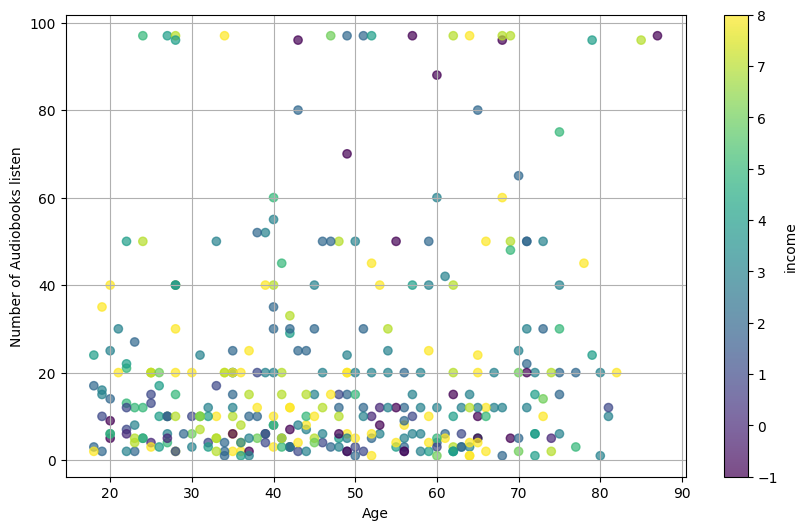

In [ ]:
# your Q2.3 visualization code should be included here
# make sure to execute it, so we can see your plot in the submitted pdf

# [Your Code Starts Here]
books = df[['books1', 'books2a', 'books2b', 'books2c', 'gender', 'age', 'par', 'income' ]]
books_filtered = books[~books['books1'].isin([0, 98, 99])]
books_filtered = books_filtered[~books_filtered['age'].isin([97, 98,99])]
books_filtered = books_filtered[~books_filtered['income'].isin([98,99])]
books_filtered = books_filtered[books_filtered['books2b'] == str(1)]
income_mapping = {
    1: '0-10,000',
    2: '10,000-20,000',
    3: '20,000-30,000',
    4: '30,000-40,000',
    5: '40,000-50,000',
    6: '50,000-75,000',
    7: '75,000-100,000',
    8: '100,000-150,000',
    9: '150,000+'
}


books_filtered['income'] = books_filtered['income'].map(income_mapping)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(books_filtered['age'], books_filtered['books1'],
                      c=books_filtered['income'].astype('category').cat.codes,
                      cmap='viridis', alpha=0.7)
cbar = plt.colorbar(scatter)
cbar.set_label('income')
plt.xlabel('Age')
plt.ylabel('Number of Audiobooks listen')
plt.grid()
plt.show()


# [Your Code Ends Here]

<img src="http://today.uic.edu/wp-content/uploads/2014/09/5-bike-lane_orange.png" width="50px" align="left" float="left"/>

<br><br><br>

## Q2.4 (15%): Level of education vs whether they use internet or not

1. Survey contain lots of data about students who are currently doing a four years masters degree followed by graduate high school level of education

2. Graduated high school has highest number of people who does not use internet

3. People with some post doc degree have no one who does not use internet

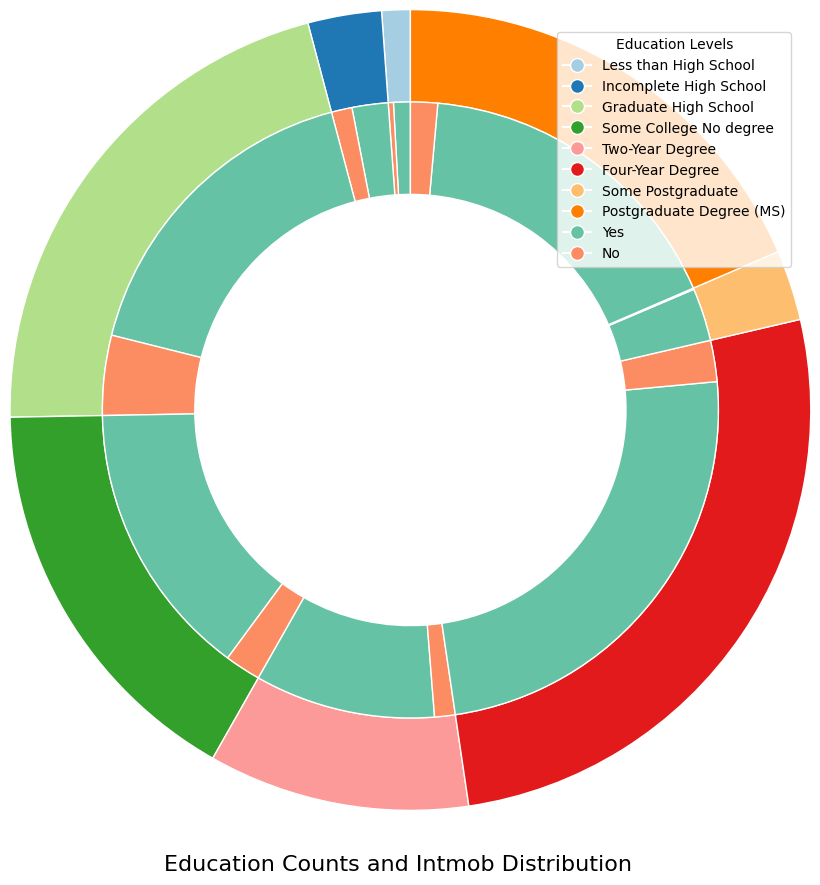

In [ ]:
# your Q2.4 visualization code should be included here
# make sure to execute it, so we can see your plot in the submitted pdf

# [Your Code Starts Here]

education = df[['educ2', 'intmob']]
education_filtered = education[~education['educ2'].isin([98, 99])]
education_filtered = education_filtered[~education_filtered['intmob'].isin([98, 99])]
summary = education_filtered.groupby(['educ2', 'intmob']).size().reset_index(name='count')
pivot_data = summary.pivot(index='educ2', columns='intmob', values='count').fillna(0)


outer_sizes = pivot_data.sum(axis=1)  # Total counts for each education level
inner_sizes = pivot_data.values        # Counts for intmob (1 and 2) for each education level


colors_outer = plt.cm.Paired(range(len(outer_sizes)))
colors_inner = plt.cm.Set2(range(inner_sizes.shape[1]))

fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('equal')
education_labels = {
    1: "Less than High School",
    2: "Incomplete High School",
    3: "Graduate High School",
    4: "Some College No degree",
    5: "Two-Year Degree",
    6: "Four-Year Degree",
    7: "Some Postgraduate",
    8: "Postgraduate Degree (MS)"
}

outer_labels = list(education_labels.keys())



mypie_outer, _ = ax.pie(outer_sizes, radius=1.3,  colors=colors_outer, startangle=90)
plt.setp(mypie_outer, width=0.3, edgecolor='white')



inner_sizes_flat = inner_sizes.flatten()


mypie_inner, _ = ax.pie(inner_sizes_flat, radius=1.0,

                         labeldistance=0.7,
                         colors=colors_inner, startangle=90)
plt.setp(mypie_inner, width=0.3, edgecolor='white')

handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                       markerfacecolor=colors_outer[i], markersize=10)
           for i, label in enumerate(education_labels.values())]
yes_handle = plt.Line2D([0], [0], marker='o', color='w', label='Yes',
                         markerfacecolor=colors_inner[0], markersize=10)
no_handle = plt.Line2D([0], [0], marker='o', color='w', label='No',
                        markerfacecolor=colors_inner[1], markersize=10)
handles.extend([yes_handle, no_handle])
ax.legend(handles=handles, title='Education Levels', loc='upper right')


plt.suptitle('Education Counts and Intmob Distribution', y=0.05, fontsize=16)


plt.show()



# [Your Code Ends Here]